# Aashia Mehta
# CS 7641: Machine Learning
# Project 4: Markov Decision Processes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import hiive.mdptoolbox.example as example
import hiive.mdptoolbox.mdp as mdp
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import seaborn as sns

# Sources:
# https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/example.py
# https://github.com/hiive/hiivemdptoolbox
# https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'con

In [2]:
def plot_reward_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Reward'] for stat in run_stats]
    plt.title("Reward vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Reward")
    plt.plot(iterations, rewards, label=label)
    plt.legend(loc='best')

In [3]:
def plot_time_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Reward'] for stat in run_stats]
    plt.title("Reward vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Reward")
    plt.plot(iterations, rewards, label=label)
    plt.legend(loc='best')

In [4]:
def plot_convergence_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Error'] for stat in run_stats]
    plt.title("Error vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.plot(iterations, rewards, label=label)
    plt.legend(loc='best')

In [5]:
def plot_convergence_iterations_mean_V(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Error'] for stat in run_stats]
    mean_V = [stat['Mean V'] for stat in run_stats]
    change_in_mean_V = [mean_V[i+1] - mean_V[i] for i in range(len(mean_V)-1)]
    plt.title("Change in Mean V vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Change in Mean V")
    plt.plot(iterations, rewards, label=label)
    plt.plot(iterations[1:], change_in_mean_V, label=label)
    plt.legend(loc='best')

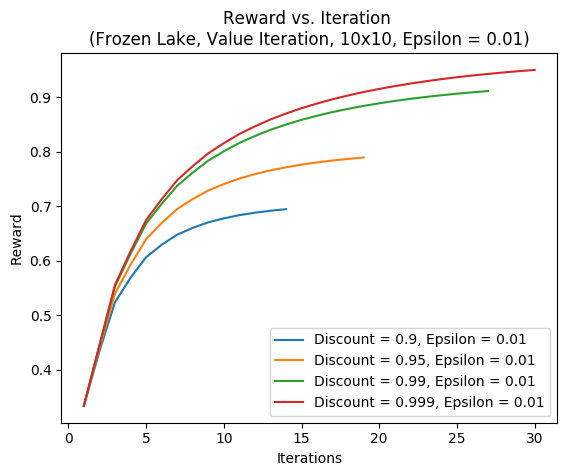

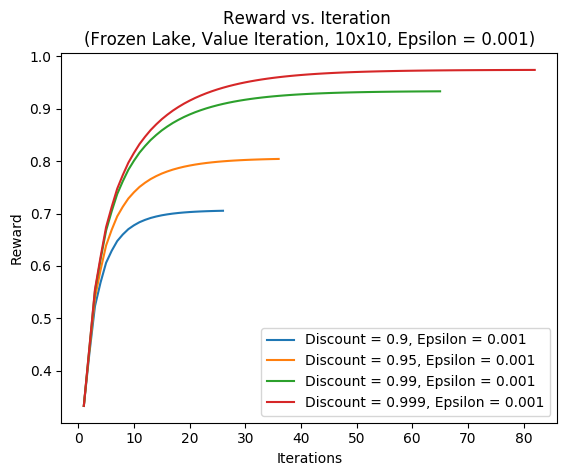

<Figure size 640x480 with 0 Axes>

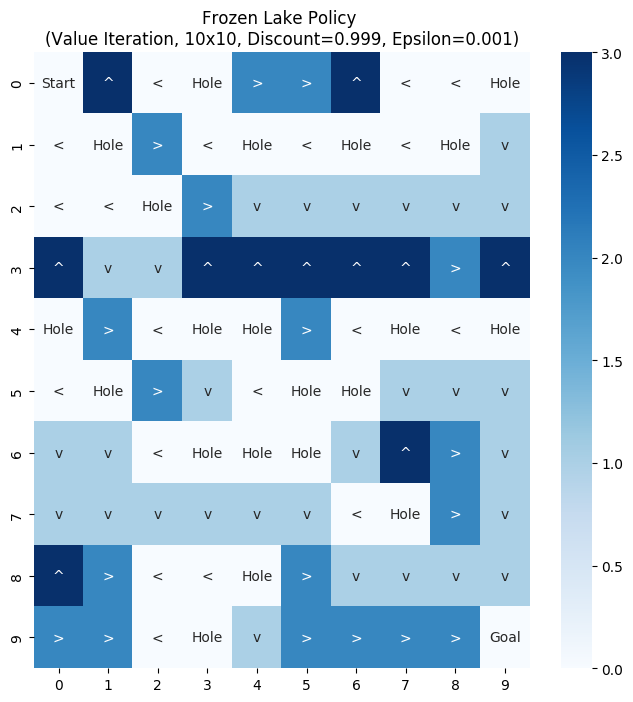

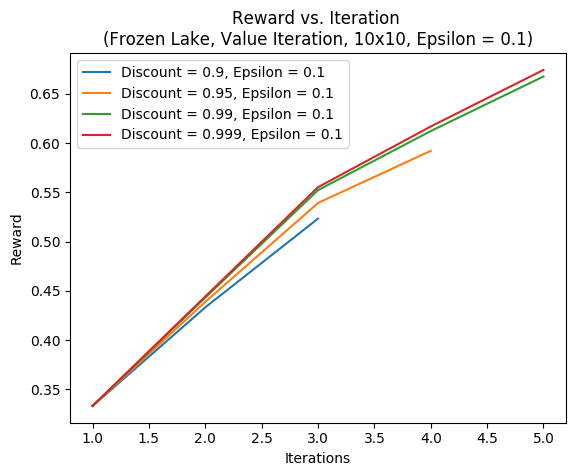

In [73]:
# FROZEN LAKE: VALUE ITERATION (10)
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = vi.policy
        create_frozen_lake_map('Frozen Lake Policy \n(Value Iteration, 10x10, Discount=0.999, Epsilon=0.001)', random_map, policy, 10, figsize=8)
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

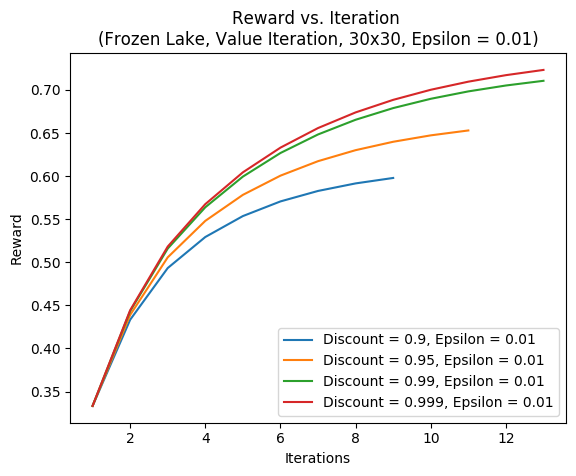

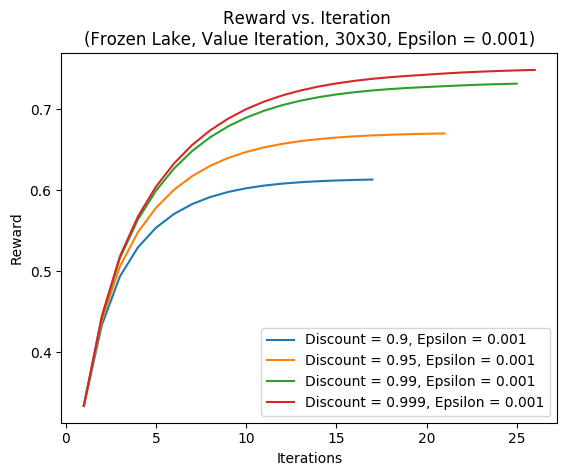

<Figure size 640x480 with 0 Axes>

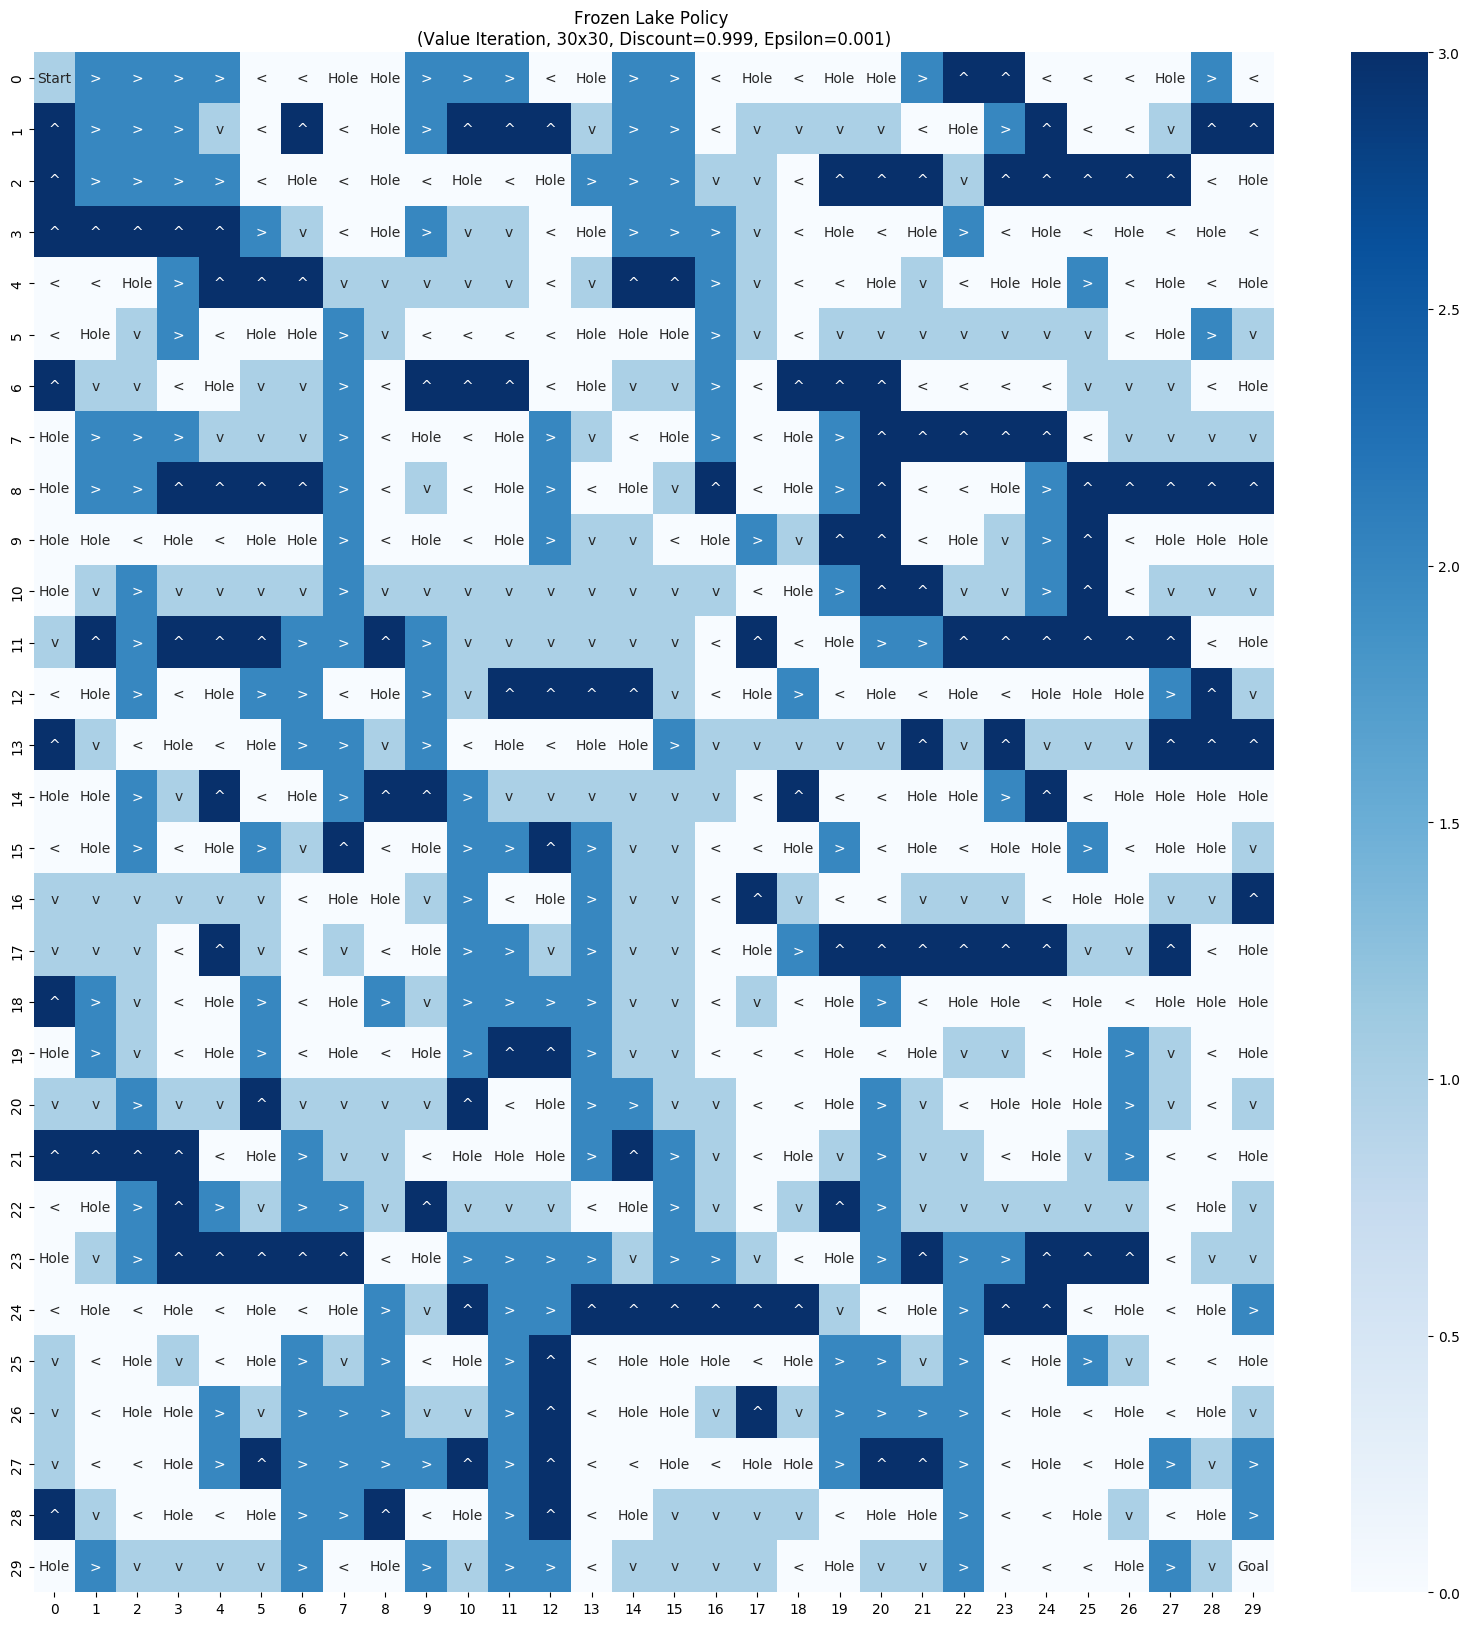

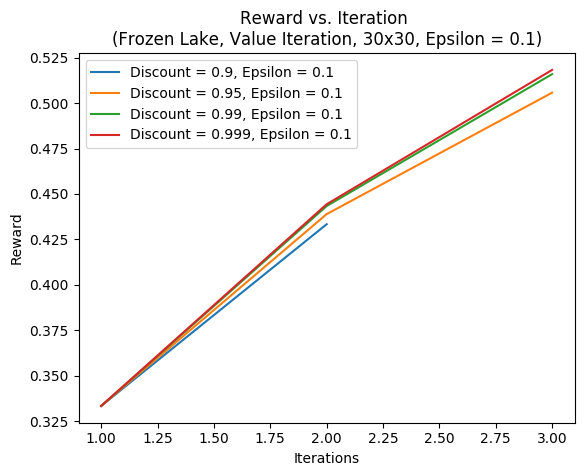

In [74]:
# FROZEN LAKE: VALUE ITERATION (30)
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = pi.policy
        create_frozen_lake_map('Frozen Lake Policy \n(Value Iteration, 30x30, Discount=0.999, Epsilon=0.001)', random_map, policy, 30, figsize=20)
    
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

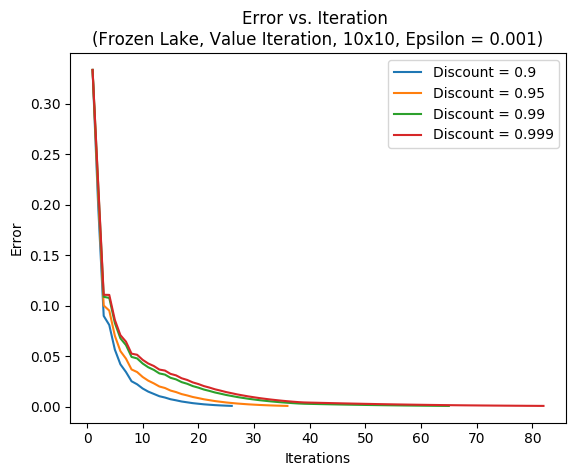

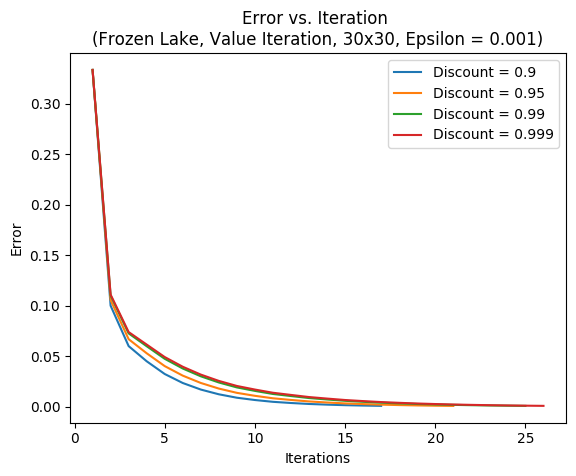

In [46]:
# FROZEN LAKE: VALUE ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FROZEN LAKE: VALUE ITERATION (30) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

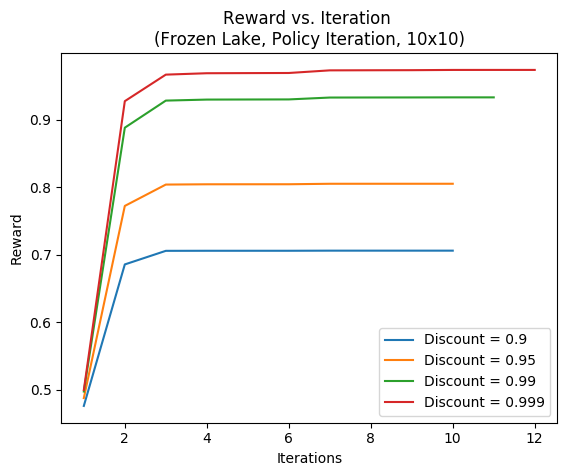

<Figure size 640x480 with 0 Axes>

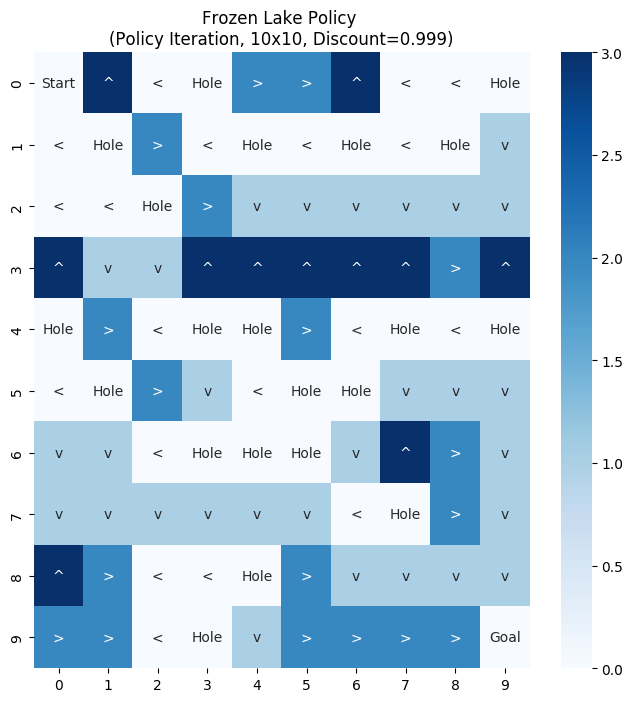

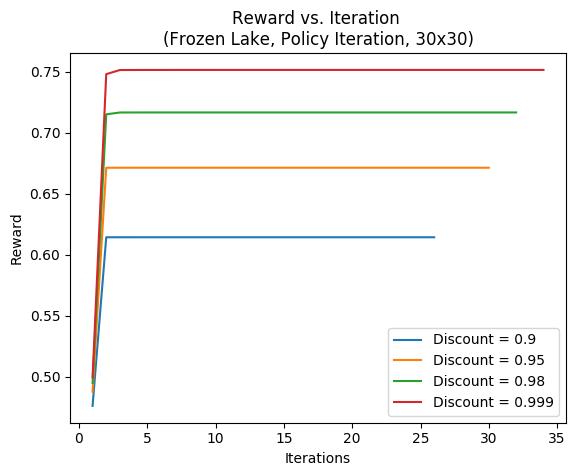

<Figure size 640x480 with 0 Axes>

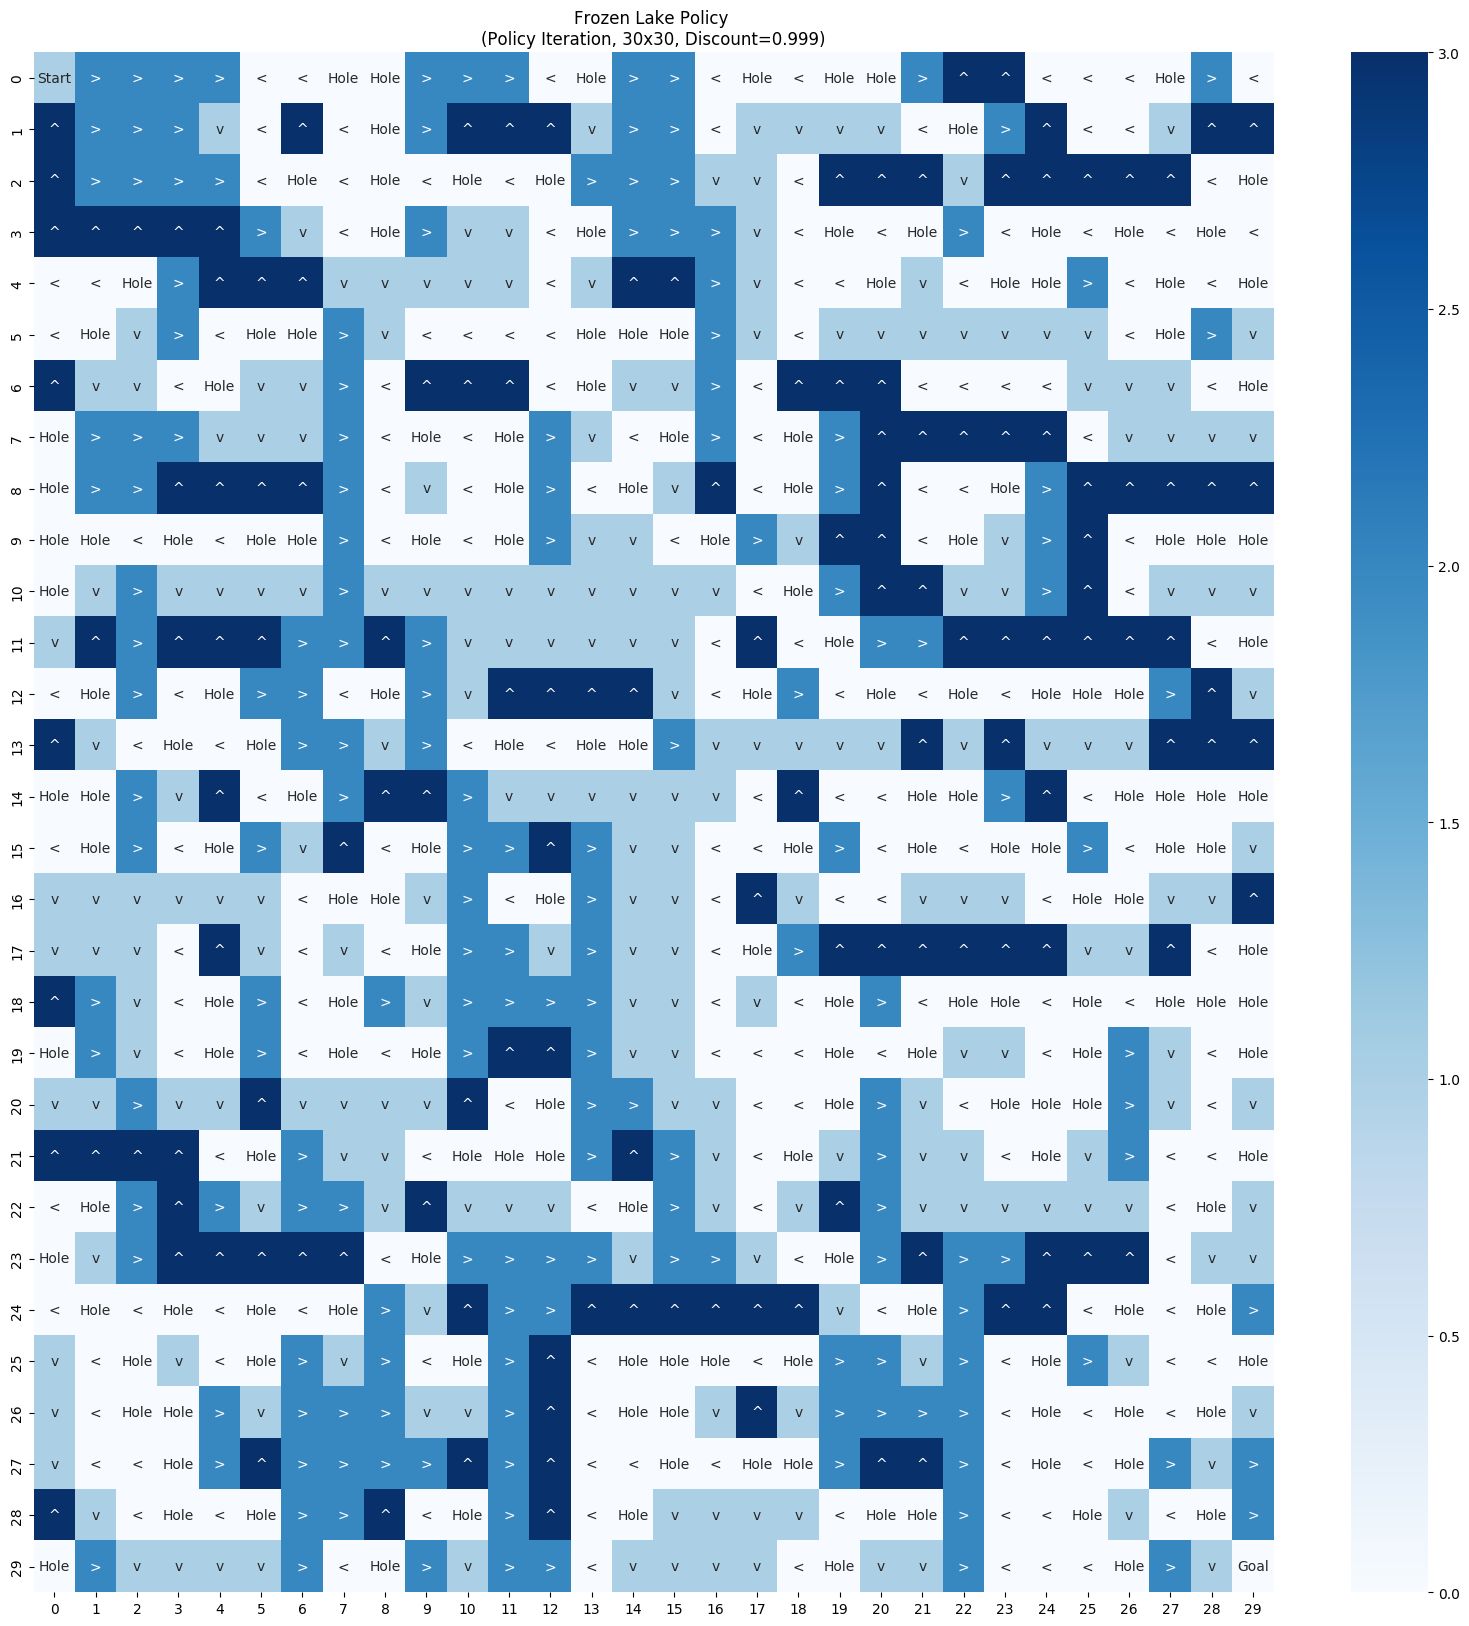

In [68]:
# FROZEN LAKE: POLICY ITERATION (10)
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 10x10", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        create_frozen_lake_map('Frozen Lake Policy \n(Policy Iteration, 10x10, Discount=0.999)', random_map, policy, 10, figsize=8)
plt.show()
plt.close()

# FROZEN LAKE: POLICY ITERATION (30)
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.98, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 30x30", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        create_frozen_lake_map('Frozen Lake Policy \n(Policy Iteration, 30x30, Discount=0.999)', random_map, policy, 30, figsize=20)
plt.show()
plt.close()

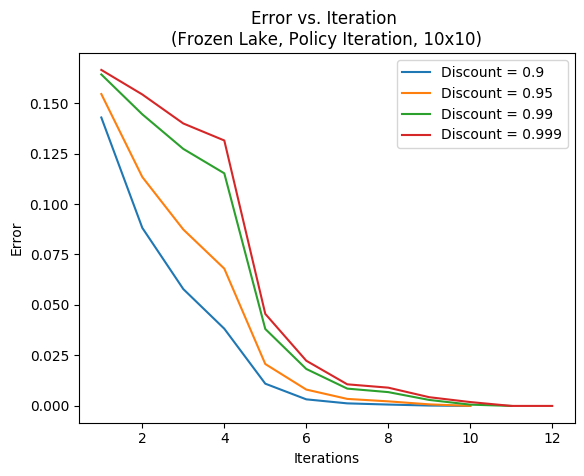

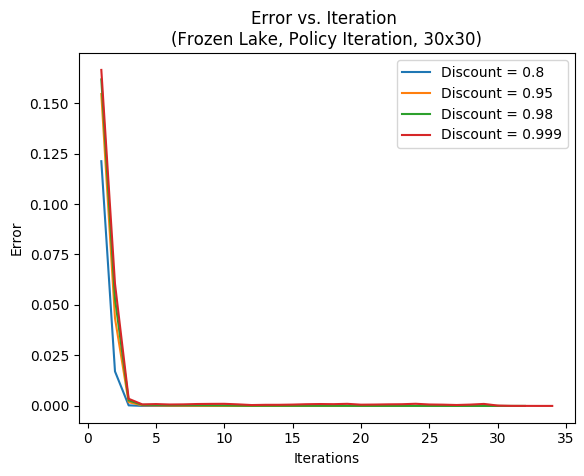

In [50]:
# FROZEN LAKE: POLICY ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 10x10", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FROZEN LAKE: POLICY ITERATION (30) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.8, 0.95, 0.98, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 30x30", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

In [70]:
def create_frozen_lake_map(title, random_map, policy, size, figsize):
    random_map_reshaped = []
    for string in random_map:
        random_map_reshaped.append(list(string))
    random_map_reshaped = np.array(random_map_reshaped)
    # print(random_map_reshaped)

    policy_reshaped = np.reshape(policy, (size, size))
    # print(policy_reshaped)

    policy_arrows = policy_reshaped.astype(str)
    policy_arrows[policy_arrows=='0'] = '<'
    policy_arrows[policy_arrows=='1'] = 'v'
    policy_arrows[policy_arrows=='2'] = '>'
    policy_arrows[policy_arrows=='3'] = '^'
    policy_arrows[random_map_reshaped=='S'] = 'Start'
    policy_arrows[random_map_reshaped=='G'] = 'Goal'
    policy_arrows[random_map_reshaped=='H'] = 'Hole'
    # print(policy_arrows)

    plt.figure()
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    ax.set_title(title)
    heatmap = sns.heatmap(policy_reshaped, annot=policy_arrows, fmt='', cmap='Blues', ax=ax)
    plt.show()
    plt.close()

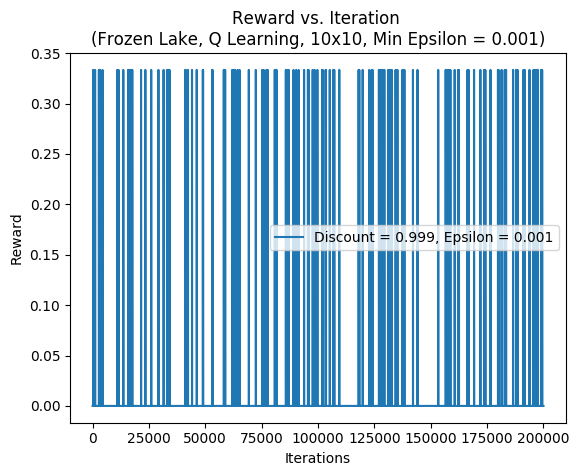

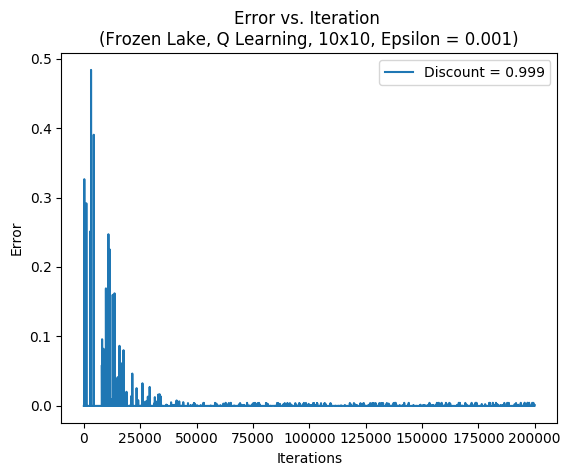

No handles with labels found to put in legend.


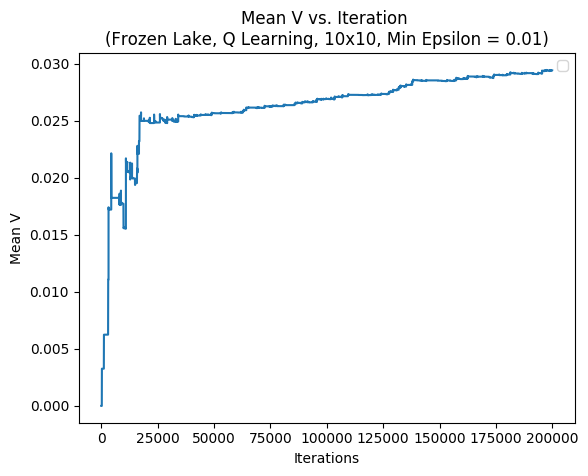

In [147]:
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)
ql = mdp.QLearning(P, R, 0.999, n_iter=200000,
                   epsilon=1,epsilon_decay=0.9999,epsilon_min=0.001,
                   alpha_decay=0.9999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1)
ql.run()
ql_run_stats = ql.run_stats
plot_reward_iterations(ql_run_stats, "Frozen Lake, Q Learning, 10x10, Min Epsilon = 0.001", 
                           "Discount = " + str(0.999) + ", Epsilon = " + str(0.001))
plt.show()
plt.close()
plot_convergence_iterations(ql_run_stats, "Frozen Lake, Q Learning, 10x10, Epsilon = 0.001", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

iterations = [stat['Iteration'] for stat in ql_run_stats]
mean_v = [stat['Mean V'] for stat in ql_run_stats]
plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 10x10, Min Epsilon = 0.01)")
plt.xlabel("Iterations")
plt.ylabel("Mean V")
plt.plot(iterations, mean_v)
plt.legend(loc='best')
plt.show()
plt.close()

In [126]:
# https://colab.research.google.com/github/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q_Learning_with_FrozenLakev2.ipynb
import gym
env = gym.make("FrozenLake-v1")
action_size = env.action_space.n
state_size = env.observation_space.n
qtable = np.zeros((state_size, action_size))

total_episodes = 100000       # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob

rewards = []
for episode in range(total_episodes):
    state, info = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = np.random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, truncated , info = env.step(action)

        max_A = np.argmax(qtable[new_state, :])
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * qtable[new_state, max_A] - qtable[state, action])
        
        total_rewards += reward
        state = new_state
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)

print("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

['SFFFFFFFFF', 'FFHFFFFFFF', 'FFFFFFFFFF', 'FFFHFFFFFH', 'FFHHFFFFFF', 'FFHFFFHFFF', 'FHFFFFHHHF', 'FFFFFFFFFF', 'FFFFFFFFHF', 'FFFHFHHFFG']
Score over time: 0.0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.

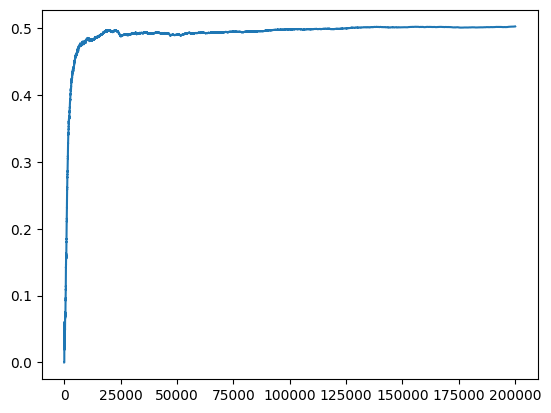

In [123]:
plt.title("Reward vs. Number of Episodes \n(Frozen Lake, Q-Learning, 10x10)")
plt.xlabel("Number of Episodes")
plt.ylabel("Reward")
plt.plot(np.cumsum(rewards) / np.arange(1, total_episodes + 1), label="Discount = 0.95, Min Epsilon = 0.01")   
plt.legend(loc='best')

[{'State': 2, 'Action': 0, 'Reward': 4.0, 'Error': 0.4, 'Time': 0.000396728515625, 'Alpha': 0.1, 'Epsilon': 1.0, 'Gamma': 0.9, 'V[0]': 0.0, 'Max V': 0.4, 'Mean V': 0.13333333333333333, 'Iteration': 1}, {'State': 2, 'Action': 0, 'Reward': 4.0, 'Error': 0.39204000000000006, 'Time': 0.0006847381591796875, 'Alpha': 0.099, 'Epsilon': 0.99, 'Gamma': 0.9, 'V[0]': 0.0, 'Max V': 0.7920400000000001, 'Mean V': 0.2640133333333334, 'Iteration': 2}, {'State': 2, 'Action': 0, 'Reward': 4.0, 'Error': 0.38427721596000003, 'Time': 0.000885009765625, 'Alpha': 0.09801, 'Epsilon': 0.9801, 'Gamma': 0.9, 'V[0]': 0.0, 'Max V': 1.1763172159600002, 'Mean V': 0.39210573865333337, 'Iteration': 3}, {'State': 2, 'Action': 1, 'Reward': 2.0, 'Error': 0.1940598, 'Time': 0.0016078948974609375, 'Alpha': 0.0970299, 'Epsilon': 0.9702989999999999, 'Gamma': 0.9, 'V[0]': 0.0, 'Max V': 1.1763172159600002, 'Mean V': 0.39210573865333337, 'Iteration': 4}, {'State': 0, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.001923799

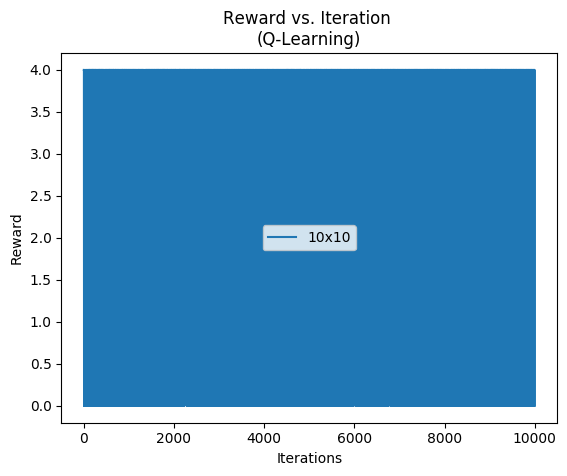

In [142]:
# FOREST
P, R = example.forest()
ql = mdp.QLearning(P, R, 0.9)
ql.run()
ql_run_stats = ql.run_stats
print(ql_run_stats)
plot_reward_iterations(ql_run_stats, "Q-Learning", "10x10")